In [1]:
#First method implementation
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# To get the intensity function for the integral 
x = [0, 0.4, 0.5, 0.8, 1.0, 1.2, 1.5, 1.6, 2.0, 2.4, 2.8, 3.2, 3.6, 3.8 ]
y = [0.044, 0.042, 0.043, 0.044, 0.045, 0.046, 0.048, 0.05, 0.053, 0.062,0.074, 0.088, 0.0885, 0.089 ]
func = interp1d(x, y, kind='cubic')
%matplotlib inline


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


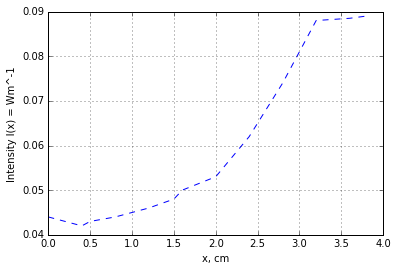

In [2]:
#Plot of intensity vs co-axial distance
plt.plot(x, func(x) , '--')
plt.ylabel('Intensity I(x) = Wm^-1')
plt.xlabel('x, cm')
plt.grid(True)
plt.show()

In [3]:
import numpy as np
x_arr = np.array(x)
#Calculating source function q(x) for different values of x with value
# of planck's value equal to 5 ASSUMPTION take plank's value equal to 5 as it is unknown to us until the 
# of the working environment is unknown
yt = -1* np.log(x_arr / 5)


#This function returns the value of q at xi point
def return_qx(x, y, xi):
    '''
    Takes values of x, y(values for source function), xi(the point at which the value of source function
    is required)
    Returns : value of qxi
    '''
    y = list(y)
    y[0] = y[1]
    ti = interp1d(x, y, kind='cubic')
    return ti(xi)
tg = interp1d(x, list(yt), kind='cubic')
yt = list(yt)
yt[0] = yt[1]
tg = interp1d(x, yt, kind='cubic')

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


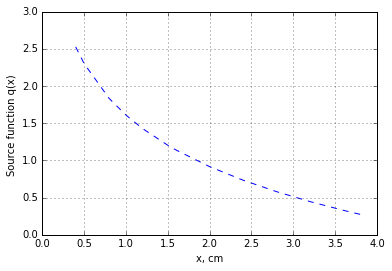

In [4]:
#Plot for source function vs the distance
plt.plot(x[1:], tg(x[1:]) , '--')
plt.ylabel('Source function q(x) ')
plt.xlabel('x, cm')
plt.grid(True)
plt.show()

In [5]:
#This function will give the value or pij as defined in the docuemnt
def return_pij(i, j, r_range, x_range):
    '''
    Parameters : value of i and j, mesh points r_range, and x_range
    Returns : Value of pij at (xi,rj)
    '''
    pij = (r_range[j+1] - x_range[i])**0.5 - (r_range[j] - x_range[i])**0.5
    return pij

In [7]:
#Creating steps for x in the range 0 to 3.7 with jump of 0.02
x_range = np.arange(0,3.7, 0.02)
tg(x_range[180])

array(0.32850406697203505)

In [8]:
#to create the uniform mesh we will give r_range as same as x_range
r_range = x_range

In [10]:
#Creating a list to store the values of k function at differeny values of xi
k = [0]*len(x_range)

In [11]:
#Evaluating k from the back, k(n-1)
kn_ = (return_qx(x, list(yt), x_range[len(x_range) - 2])/2.0)/ (return_pij(len(x_range) - 2, len(x_range) - 2, r_range, x_range) )

In [12]:
#Append k(n-1) into the list k
k[len(x_range) - 1] = kn_

In [13]:
arr_t = range(len(x_range))

In [14]:
arr_t.reverse()

In [16]:
#loop to calculate the rest of k(xi) with pij and previous k(xi)
for i in arr_t[1:]:
    sigma = 0
    for j in range(i+1, 184 ):
        sigma = sigma + return_pij(i, j, r_range, x_range) *k[j]
    kn_minus = (return_qx(x, list(yt), x_range[i])/2.0 - sigma)/ return_pij(i, i, r_range, x_range)
    k[i] = kn_minus

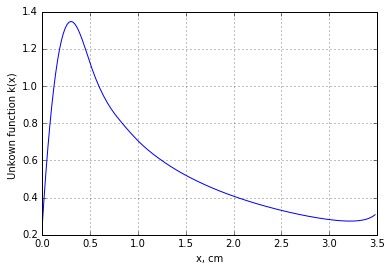

In [22]:
#Plotting the final evaluated k values with the x steps on x-axis
plt.plot(x_range[:-10], k[:-10] , '-')
plt.ylabel('Unkown function k(x) ')
plt.xlabel('x, cm')
plt.grid(True)
plt.show()